In [17]:
%pip install qiskit==1.2.4
%pip install qiskit-aer==0.15.1
%pip install pylatexenc==2.10


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


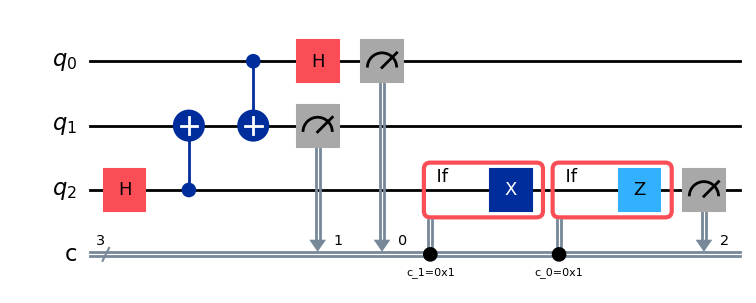

In [18]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_gate
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator
from qiskit import transpile 
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_counts

# Teleportation

teleport = QuantumCircuit(3,3)

# qubit 0 is the state to be teleported from Alice
# qubits 1 and 2 are the shared entangled state
# Alice has qubit 1, Bob has qubit 2

# Entangle qubits 1 and 2
teleport.h(2)
teleport.cx(2,1)

# Entangle qubit 0 with the others
teleport.cx(0,1)
teleport.h(0) 

# Measure qubits 0 and 1 and put the results on classical bits 0 and 1
teleport.measure([0,1],[0,1])

# Fix up the final state of qubit 2, depending on the measurement results
with teleport.if_test((1, 1)):
    teleport.x(2)
with teleport.if_test((0, 1)):
    teleport.z(2)

# Measure qubit 2 and put the result on classical bit 2
teleport.measure([2],[2])

teleport.draw("mpl")

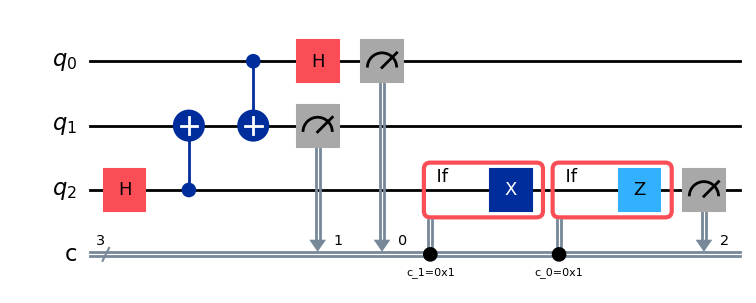

In [19]:
# Use a circuit to put qubit 0 into the state that we want to teleport,
# and compose it into the main circuit.

prep = QuantumCircuit(1) 
#prep.h(0) 

teleport = teleport.compose(prep, [0], front=True)
teleport.draw("mpl")

/home/jovyan/.qbraid/environments/qbraid_sdk_9j9sjy/pyenv/lib/python3.11/site-packages/qiskit_aer/noise/noise_model.py:378: UserWarning: Qiskit backend <qiskit.providers.fake_provider.generic_backend_v2.GenericBackendV2 object at 0x7d648c608150> has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


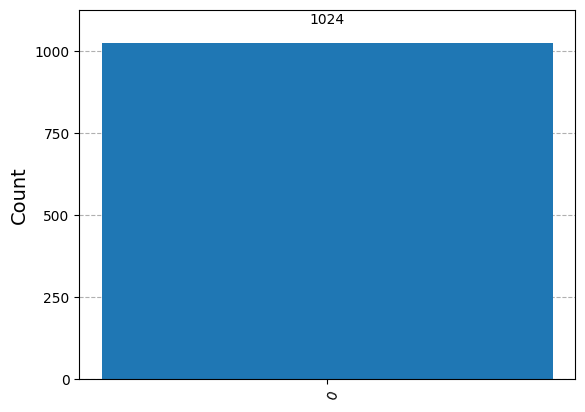

In [20]:
# Now simulate and plot the results.
# In general this won't tell us that we have exactly the right state,
# just that we get the right measurement statistics.
# We are interested in the result on classical bit 2, which is the most significant bit (leftmost).
# The simulator adds some noise, so we get some non-zero probabilities for parts of bit 2 that shouldn't be there.
# To see results without noise, add the parameter noise_info=False to GenericBackendV2

backend = GenericBackendV2(num_qubits=3, control_flow=True)
compiled = transpile(teleport, backend)
job_sim = backend.run(compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(compiled)
mcounts = marginal_counts(counts,indices=[2]) # We only want to see the results for bit 2
plot_histogram(mcounts)

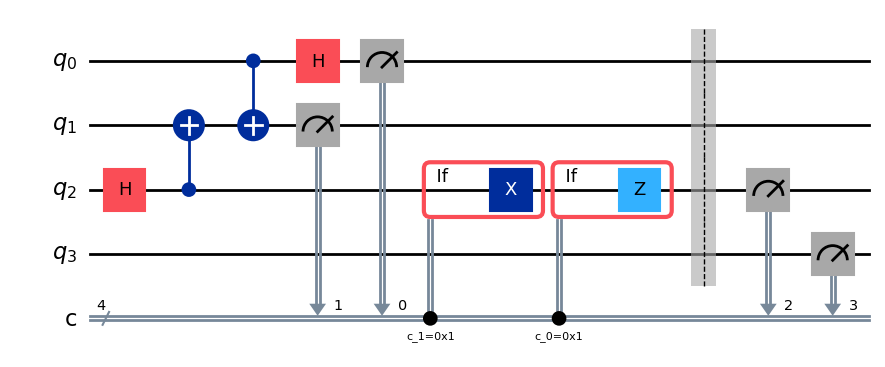

In [21]:
# Teleportation has an interesting feature which is not usually
# included in the description.

# If the qubit being teleported is entangled with other qubits, then after
# teleportation it is still entangled in the same way.

# Try this out!

# Use qubits 0, 1 and 2 as in the original teleportation, but also introduce qubit 3.

teleport = QuantumCircuit(4,4)

# qubit 0 is the state to be teleported from Alice
# qubits 1 and 2 are the shared entangled state
# Alice has qubit 1, Bob has qubit 2

# Entangle qubits 1 and 2
teleport.h(2)
teleport.cx(2,1)

# Entangle qubit 0 with the others
teleport.cx(0,1)
teleport.h(0) 

# Measure qubits 0 and 1 and put the results on classical bits 0 and 1
teleport.measure([0,1],[0,1])

# Fix up the final state of qubit 2, depending on the measurement results
with teleport.if_test((1, 1)):
    teleport.x(2)
with teleport.if_test((0, 1)):
    teleport.z(2)

# Barrier to make the diagram clearer
teleport.barrier()

# Measure qubits 2 and 3 and put the result on classical bits 2 and 3
teleport.measure([2,3],[2,3])

teleport.draw("mpl")

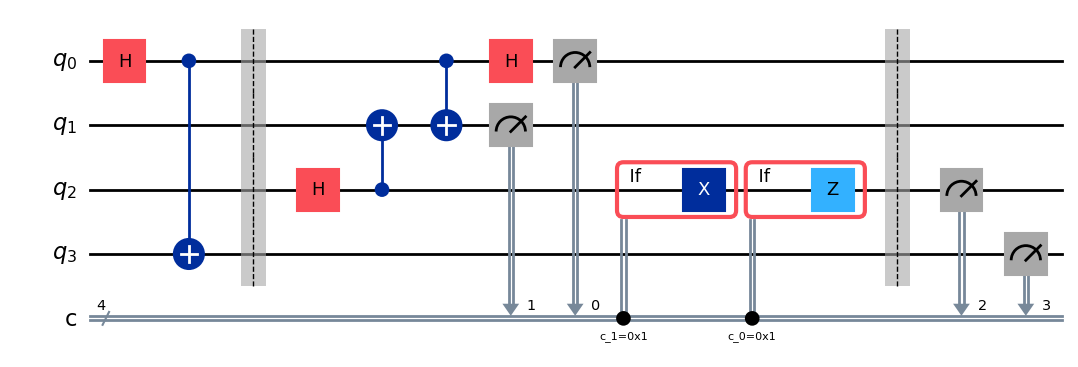

In [22]:
# Use a circuit to put qubits 0 and 3 into a Bell state,
# and compose it into the main circuit.

prep = QuantumCircuit(4) 
prep.h(0)
prep.cx(0,3)

# Barrier to make the diagram clearer
prep.barrier()

teleport = teleport.compose(prep, [0,1,2,3], front=True)
teleport.draw("mpl")

/home/jovyan/.qbraid/environments/qbraid_sdk_9j9sjy/pyenv/lib/python3.11/site-packages/qiskit_aer/noise/noise_model.py:378: UserWarning: Qiskit backend <qiskit.providers.fake_provider.generic_backend_v2.GenericBackendV2 object at 0x7d648c4d5290> has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


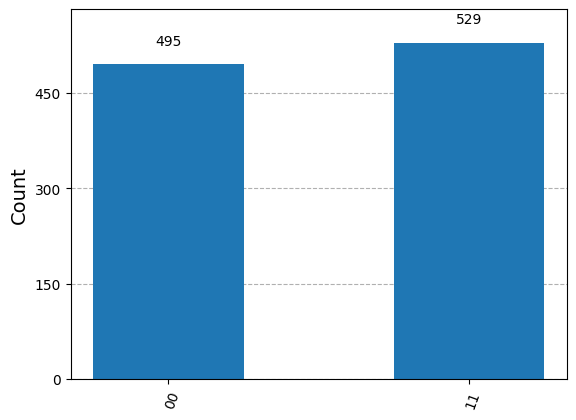

In [23]:
# Now simulate and plot the results. We are interested in classical bits 2 and 3
# In general this won't tell us that we have exactly the right state,
# just that we get the right measurement statistics.
# The simulator adds some noise, so we get some non-zero probabilities for parts of bit 2 that shouldn't be there.
# To see results without noise, add the parameter noise_info=False to GenericBackendV2

backend = GenericBackendV2(num_qubits=4, control_flow=True)
compiled = transpile(teleport, backend)
job_sim = backend.run(compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(compiled)
mcounts = marginal_counts(counts,indices=[2,3]) # We only want to see the results for bits 2 and 3
plot_histogram(mcounts)